In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
x1 = np.random.normal(loc=11, scale=2.0, size=100)
y1 = np.random.normal(loc=5, scale=3.0, size=100)

x2 = np.random.normal(loc=3, scale=1.5, size=75)
y2 = np.random.normal(loc=15, scale=2.0, size=75)

# X = np.expand_dims(np.append(x1,x2),axis=1)
# Y = np.expand_dims(np.append(y1,y2),axis=1)

# data = np.concatenate((X,Y),axis=1)

X = np.append(x1,x2)
Y = np.append(y1,y2)
data = np.column_stack((X,Y))

print(X,'\n',Y,'\n',data)

[10.61001025  8.07835476 11.39212065 10.10502508 12.37788766 10.4823535
 10.98246023 11.6355963  11.22224547 10.06625978  9.38687051 13.8590399
  8.91487023 12.18853586 12.61719622  7.79742903 11.74295283 13.12611583
 12.7790627   8.13520066  9.84238588  8.23631925 13.399275    9.91677907
  6.98294176  9.36762866 13.14888765 12.52866083  9.00102187 10.77016603
  9.49108161 13.26419248 14.76304179 11.88076826 10.83376929  9.96544209
 11.98579955 12.97691274  9.91702684  9.90524628 14.72984062  8.94137805
 11.50369741 12.64914068 10.93821223 11.73655472 14.04699108  9.74629055
  7.71006967 11.47602325 10.90070327 10.28754548 13.73112812  8.95031595
  6.23567719 13.09549398 11.69341495 12.09038232 11.52740977 10.9511643
 11.57484953 11.54380738  6.0085828   8.69859207 13.10367719  9.48916444
 11.60251712  9.2278057  10.62825363 13.37677167 12.54257444 12.23448482
 12.08411621 14.80056114  8.88065176 10.49965693 11.5381055  11.2724129
  9.99356508 11.52950532 12.38516789 12.75127961 12.822

In [85]:
def ecl(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [86]:
def cost_calc(datapoints,label):
    memoid_ind = np.where(label==-1)[0]
    cost=0
    for i,d in enumerate(datapoints):
        if label[i]==-1:
            continue
        dist = [ecl(d,datapoints[c]) for c in memoid_ind]
        min_dist_ind = np.argmin(dist)
        label[i] = min_dist_ind
        cost+=dist[min_dist_ind]
    return cost,label

In [87]:
def print_graph(datapoint,label,memoid,k):
    for i in range(k):
        points=datapoint[label==i]
        plt.scatter(points[:,0],points[:,1],label="Cluster: "+str(i+1))
        plt.scatter(memoid[0][i],memoid[i][1],label="Memoid: "+str(i+1))
        plt.scatter(memoid[0][i],memoid[i][1], alpha=0.2, s=40000)
    plt.legend()
    plt.show()

In [88]:
def k_memoid(datapoints,k):

    label = np.zeros(shape = datapoints.shape[0])
    memoid_ind = np.random.choice(datapoints.shape[0],k,replace=False)
    label[memoid_ind]=-1
    cost,label = cost_calc(datapoints,label)

    prevcost = cost+1
    itr=0;
    while prevcost>cost:
        print(str(itr+1)+" iterations, cost: ",cost)
        # print_graph(datapoints,label,datapoints[memoid_ind],k)
        itr+=1
        prevcost = cost
        for m_ind,m in enumerate(memoid_ind):
            for i, d in enumerate(datapoints):
                if(label[i]==-1):
                    continue
                temp = label[i]
                label[i]=-1
                label[m]= 0

                newcost,label = cost_calc(datapoints,label)
                if(newcost<cost):
                    cost=newcost
                    memoid_ind[m_ind]=i
                    break

                label[m]=-1
                label[i] = temp
                # label[i]=0
    
    cost,label = cost_calc(datapoints,label)
    return memoid_ind,label

In [89]:
memoid_ind, label = k_memoid(data,2)
memoid = data[memoid_ind]
print("memoids: ",memoid,'\n',"labels: ",label)

1 iterations, cost:  1001.2766245248804
2 iterations, cost:  891.4409224026829
3 iterations, cost:  833.696582186013
4 iterations, cost:  795.6700103005377
5 iterations, cost:  535.1461916339728
6 iterations, cost:  523.3446132624226
7 iterations, cost:  488.05102188402424
8 iterations, cost:  478.16297416291576
9 iterations, cost:  476.2779238753179
10 iterations, cost:  475.9340340589172
11 iterations, cost:  475.38150136457404
memoids:  [[ 2.86665304 14.98725526]
 [11.39212065  5.64002771]] 
 labels:  [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.

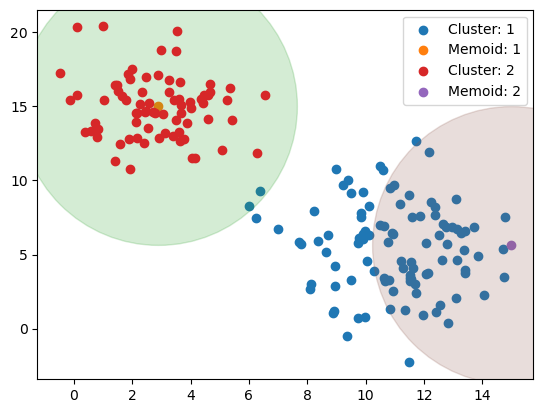

In [90]:
print_graph(data,label,memoid,memoid.shape[0])